In [72]:
from sklearn.datasets import make_blobs
A, b = make_blobs(n_samples=10, centers=3, n_features=2,random_state=0)

In [73]:

X = A.tolist()

In [74]:
A

array([[ 1.12031365,  5.75806083],
       [ 1.7373078 ,  4.42546234],
       [ 2.36833522,  0.04356792],
       [ 0.87305123,  4.71438583],
       [-0.66246781,  2.17571724],
       [ 0.74285061,  1.46351659],
       [-4.07989383,  3.57150086],
       [ 3.54934659,  0.6925054 ],
       [ 2.49913075,  1.23133799],
       [ 1.9263585 ,  4.15243012]])

In [79]:
X[3]

[0.8730512267529372, 4.714385829386762]

In [77]:
x = []
y = []
for i in range(len(X)):
    x.append(X[i][0])
    y.append(X[i][1])
x    

[1.1203136497073731,
 1.7373078036934886,
 2.368335223083779,
 0.8730512267529372,
 -0.6624678143623997,
 0.7428506107657022,
 -4.079893829055984,
 3.5493465945904843,
 2.4991307541783034,
 1.9263584960720843]

In [78]:
import plotly.express as px
fig = px.scatter(x= x, y= y )
fig.show()

In [80]:
import numpy as np

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)




# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)


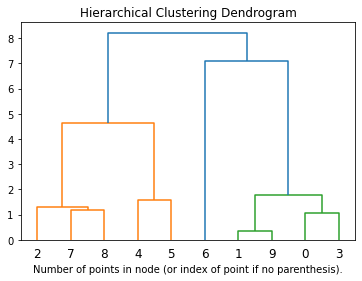

In [81]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [85]:
import plotly.express as px
fig = px.scatter(x= x, y= y )
fig.show()

In [91]:
from scipy.spatial import distance
nearestObjects = []
for i in range(len(X)):
    if i == 3:
        continue
    nearestObjects.append((distance.euclidean(X[3], X[i]), X.index(X[3]), X.index(X[i]), X[i] ) )

nearestObjects
nearestObjects.sort(key=lambda y: y[0])
nearestObjects = nearestObjects[:5]
nearestObjects

[(0.911271754871729, 3, 1, [1.7373078036934886, 4.425462343941218]),
 (1.0725652529885554, 3, 0, [1.1203136497073731, 5.758060834411365]),
 (1.1938385250390793, 3, 9, [1.9263584960720843, 4.152430119150692]),
 (2.9669271861071453, 3, 4, [-0.6624678143623997, 2.175717240926681]),
 (3.253475531370548, 3, 5, [0.7428506107657022, 1.463516586734358])]

In [102]:
candidateObjects = []
candidateObjects.append(nearestObjects[0])
minDistance = nearestObjects[0][0]
for i in range(len(nearestObjects)):
    if i == 0 :
        continue
    if distance.euclidean(X[nearestObjects[0][2]], X[nearestObjects[i][2]]) >= minDistance*.6:
        candidateObjects.append(nearestObjects[i])

candidateObjects

[(0.911271754871729, 3, 1, [1.7373078036934886, 4.425462343941218]),
 (1.0725652529885554, 3, 0, [1.1203136497073731, 5.758060834411365]),
 (2.9669271861071453, 3, 4, [-0.6624678143623997, 2.175717240926681]),
 (3.253475531370548, 3, 5, [0.7428506107657022, 1.463516586734358])]

In [96]:
distance.euclidean(X[1], X[9])

0.3320945047164902